In [18]:
#we imported Pandas, SPark.sql, Numpy,Pyplot and sealine

from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pyspark.sql.functions as F

In [19]:
#spark session imported

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Project1").master("local").getOrCreate()

In [20]:
spark

In [22]:
#bank data uplaoded from the FTP Server

bank_data = spark.read.format("csv").option('delimiter', '\t').load('Project 1_dataset_bank-full (2).csv')

In [12]:
bank_data.show()

+--------------------+
|                 _c0|
+--------------------+
|"age;""job"";""ma...|
|"58;""management"...|
|"44;""technician"...|
|"33;""entrepreneu...|
|"47;""blue-collar...|
|"33;""unknown"";"...|
|"35;""management"...|
|"28;""management"...|
|"42;""entrepreneu...|
|"58;""retired"";"...|
|"43;""technician"...|
|"41;""admin."";""...|
|"29;""admin."";""...|
|"53;""technician"...|
|"58;""technician"...|
|"57;""services"";...|
|"51;""retired"";"...|
|"45;""admin."";""...|
|"57;""blue-collar...|
|"60;""retired"";"...|
+--------------------+
only showing top 20 rows



In [23]:
bank_data.printSchema()

#printing schema of bank data

root
 |-- _c0: string (nullable = true)



In [14]:
bank_data.show(2, truncate = False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|_c0                                                                                                                                                                                   |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""|
|"58;""management"";""married"";""tertiary"";""no"";2143;""yes"";""no"";""unknown"";5;""may"";261;1;-1;0;""unknown"";""no"""                                                           |
+--------------------------------------------------------------------------

In [25]:
## We need to remove the double quotes in the values to extract the dataframe in the right format

bank_data1 = bank_data.withColumn('_c0', regexp_replace('_c0', '"', '')).rdd

In [26]:
bank_data1.take(10)

[Row(_c0='age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;y'),
 Row(_c0='58;management;married;tertiary;no;2143;yes;no;unknown;5;may;261;1;-1;0;unknown;no'),
 Row(_c0='44;technician;single;secondary;no;29;yes;no;unknown;5;may;151;1;-1;0;unknown;no'),
 Row(_c0='33;entrepreneur;married;secondary;no;2;yes;yes;unknown;5;may;76;1;-1;0;unknown;no'),
 Row(_c0='47;blue-collar;married;unknown;no;1506;yes;no;unknown;5;may;92;1;-1;0;unknown;no'),
 Row(_c0='33;unknown;single;unknown;no;1;no;no;unknown;5;may;198;1;-1;0;unknown;no'),
 Row(_c0='35;management;married;tertiary;no;231;yes;no;unknown;5;may;139;1;-1;0;unknown;no'),
 Row(_c0='28;management;single;tertiary;no;447;yes;yes;unknown;5;may;217;1;-1;0;unknown;no'),
 Row(_c0='42;entrepreneur;divorced;tertiary;yes;2;yes;no;unknown;5;may;380;1;-1;0;unknown;no'),
 Row(_c0='58;retired;married;primary;no;121;yes;no;unknown;5;may;50;1;-1;0;unknown;no')]

In [27]:
bank_data2 = bank_data1.map(lambda x: x[0].split(";"))
header = bank_data2.first()

In [28]:
bd_data3 = bank_data2.filter(lambda x: x!= header)
bd_df =bd_data3.map(lambda x: (int(x[0]), x[1], x[2], x[3], x[4], int(x[5]), x[6], x[7], x[8],\
                                   x[9], x[10], int(x[11]), int(x[12]), int(x[13]), int(x[14]), x[15], x[16]))

In [29]:
df = bd_df.toDF(header)

In [30]:
df.show(10)

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown|  single|  unknown|     no|      1|     no|  no|unknown|  5|  may

In [31]:
df.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

# Give marketing success rate (No. of people subscribed / total no. of entries 

In [33]:
# saving the df to view to do analysis on top of it
df.createOrReplaceTempView('df')

In [34]:
spark.sql(""" select age from df where age== 0 """).show()
## after explicit conversion there is no value in age column that corresponds to missing/ null value

+---+
|age|
+---+
+---+



In [35]:
## Total no of enteries are 45211
spark.sql("""select count(*) from df """).show()

+--------+
|count(1)|
+--------+
|   45211|
+--------+



In [36]:
spark.sql("""select  round((count(y)/45211) * 100, 2) as market_success_rate from df where y = 'yes' """).show()

+-------------------+
|market_success_rate|
+-------------------+
|               11.7|
+-------------------+



# Give Market Failure Rate

In [39]:
##Give the maximum, mean, and minimum age of the average targeted customer

In [40]:
spark.sql (""" select max(age), min(age), round(mean(age), 2) from df where y == 'no' """).show()

+--------+--------+------------------+
|max(age)|min(age)|round(avg(age), 2)|
+--------+--------+------------------+
|      95|      18|             40.84|
+--------+--------+------------------+



In [41]:
##Check the quality of customers by checking average balance, median balance of customers

In [42]:
ordered_df = spark.sql("""select * from df where y == 'no' order by balance """)
ordered_df.createOrReplaceTempView("ordered_df")

In [43]:
spark.sql("""select AVG(balance) as Mean_Amt, PERCENTILE(balance, 0.5) as Median_Amt FROM ordered_df """).show()

+------------------+----------+
|          Mean_Amt|Median_Amt|
+------------------+----------+
|1303.7149691899203|     417.0|
+------------------+----------+



In [44]:
##Check if age matters in marketing subscription for deposit

In [45]:
## We have created age bins to help visualize how different segments responded

spark.sql("""select age, count(y) as number from df where y == 'no' group by age order by number desc """).\
withColumn("agebins", F.when(df.age < 30, '<30')\
           .when((df.age>= 30) & (df.age < 35), '30-35')\
           .when((df.age>= 35) & (df.age < 40), '35-40')\
           .when((df.age>= 40) & (df.age < 45), '40-45')\
           .when((df.age>= 45) & (df.age < 50), '45-50')\
           .when((df.age>= 50) & (df.age < 60), '50-60')\
           .otherwise('+60')).createOrReplaceTempView("agebins")
                

In [46]:
plot_df= spark.sql("select agebins, sum(number) as no_response from agebins group by agebins ").toPandas()

In [47]:
plot_df

,agebins,no_response
0,+60,1184
1,40-45,5642
2,45-50,4950
3,30-35,8688
4,35-40,7488
5,50-60,7625
6,<30,4345


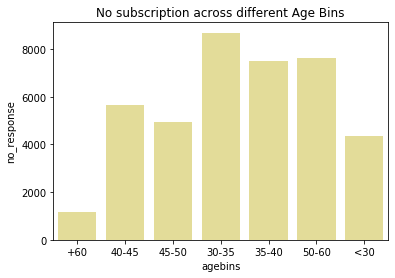

In [48]:
sns.barplot(data = plot_df, x = 'agebins', y = 'no_response', color = 'khaki')
plt.title("No subscription across different Age Bins")
plt.show()

In [49]:
##Check if marital status mattered for a subscription to deposit

In [53]:
spark.sql("""select marital, count(y) as number from df where y LIKE 'no' group by marital order by number desc """).show()

+--------+------+
| marital|number|
+--------+------+
| married| 24459|
|  single| 10878|
|divorced|  4585|
+--------+------+

